In [1]:
import segment
import refine
import classify
import recognize
import utils

# size of the image
height, width = 64, 128

# name of the directory to save weights
# and number of epochs to train for each model.
segment_train_name, segment_epochs = "my_train", 20
refine_train_name, refine_epochs = "my_train", 20
classify_train_name, classify_epochs = "my_train", 10

# got this code from https://github.com/Tony607/keras-image-ocr.
# changed it according to your notes.

# UPD: but changed it, really, a lot.

Using TensorFlow backend.


# Генерация изображений

Изображения с заданным размером и текстом генерируются с помощью python package'й "cairocffi" и "scipy".
Случайным образом выбирается шрифт, положение текста и интенсивность размытия.

Изображение с текстом:


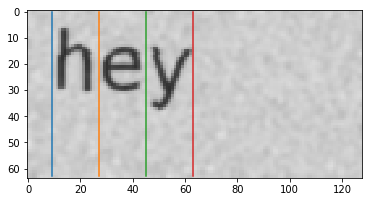

Изображение с отдельной буквой:


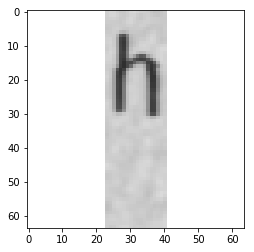

In [2]:
print("Изображение с текстом:")
text_image, segments = utils.generate_text_image('hey', height = height, width = width)
utils.show_image_with_segments(text_image, segments)

print("Изображение с отдельной буквой:")
character_image = utils.extend_image_size(text_image[:, :, segments[0]:segments[1]], new_width = height)
utils.show_image_with_segments(character_image, [])


# 1-ая модель

Задача 1-ой модели - CNN:
+ научиться правильно предсказывать разбиения изображения на сегменты с отдельными буквами изображённого текста

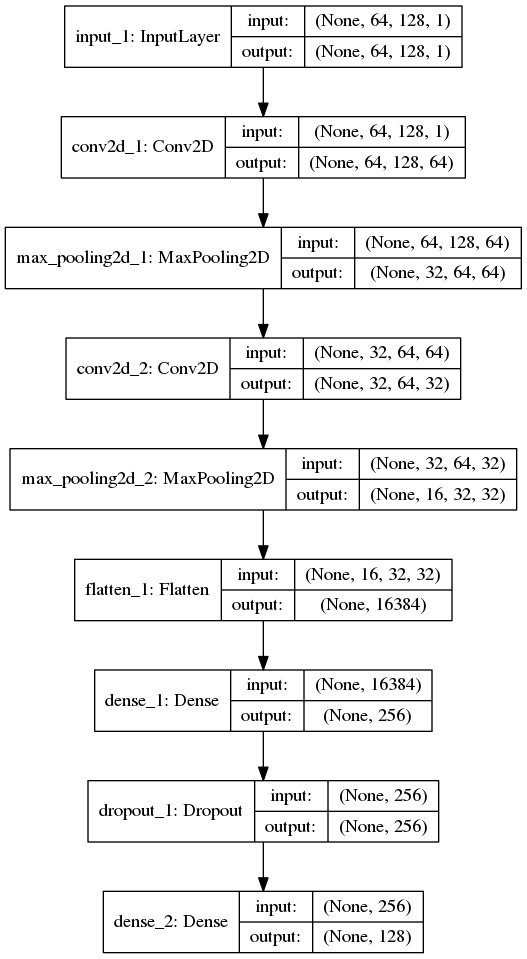

In [3]:
segment_model = segment.TextImageModel(image_height = height, image_width = width)
segment_model.display_architecture()

## Обучение
В конце каждой эпохи весы сохраняются в "OCR/my_train/segment".
Этот блок можно и не проигрывать, так как он может отнять у вас достаточно много времени.
Если блок не будет проигран, то все веса будут выгружаться из "OCR/train/segment".

In [4]:
segment_train_name = "my_train"
segment_model.train(segment_train_name, 0, segment_epochs)

Epoch 1/20
400/400 [==============================] - 72s 180ms/step - loss: 0.1749 - acc: 0.9606 - val_loss: 0.1505 - val_acc: 0.9646
Epoch 2/20
400/400 [==============================] - 70s 176ms/step - loss: 0.1483 - acc: 0.9652 - val_loss: 0.1357 - val_acc: 0.9645
Epoch 3/20
400/400 [==============================] - 72s 179ms/step - loss: 0.1353 - acc: 0.9651 - val_loss: 0.1236 - val_acc: 0.9646
Epoch 4/20
400/400 [==============================] - 71s 178ms/step - loss: 0.1244 - acc: 0.9650 - val_loss: 0.1182 - val_acc: 0.9646
Epoch 5/20
400/400 [==============================] - 74s 185ms/step - loss: 0.1158 - acc: 0.9648 - val_loss: 0.1064 - val_acc: 0.9649
Epoch 6/20
400/400 [==============================] - 75s 187ms/step - loss: 0.1092 - acc: 0.9649 - val_loss: 0.1032 - val_acc: 0.9651
Epoch 7/20
400/400 [==============================] - 74s 185ms/step - loss: 0.1043 - acc: 0.9650 - val_loss: 0.0982 - val_acc: 0.9653
Epoch 8/20
400/400 [==============================] - 7

График обучения:

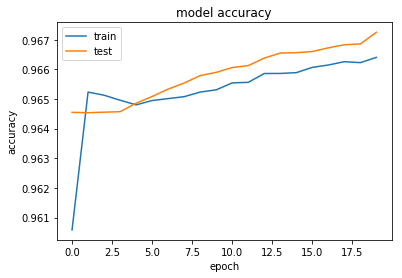

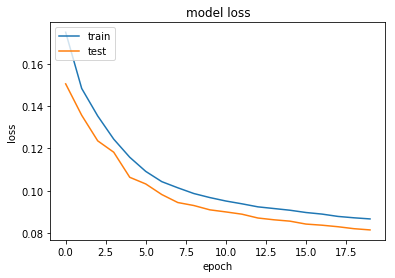

In [5]:
segment_model.display_train_history()

## Загрузка весов
Загрузка весов из "OCR/train/segment" (или же из "OCR/my_train/segment", если блок с обучением был проигран).

In [4]:
segment_model.load(segment_train_name, segment_epochs)

## Предсказание
Предсказываем разбиение на сегменты для ранее сгенерированного изображения.

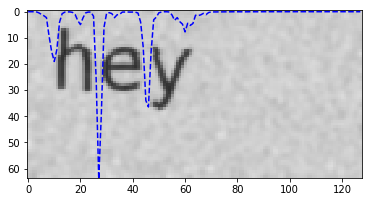

In [5]:
predicted_segments = segment_model.predict(text_image)
utils.show_image_with_segments(text_image, predicted_segments, mask = True)

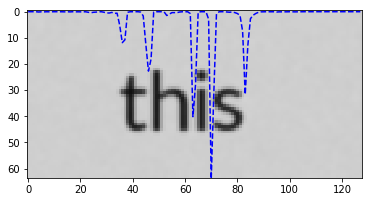

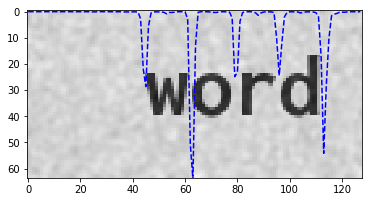

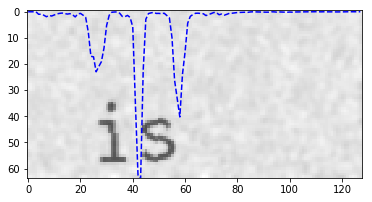

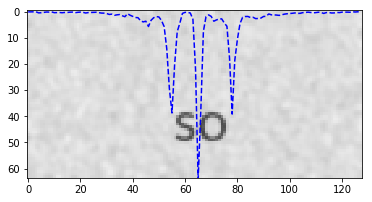

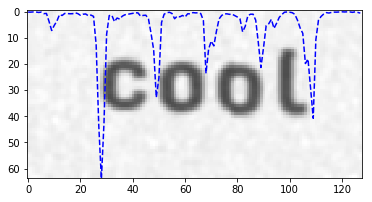

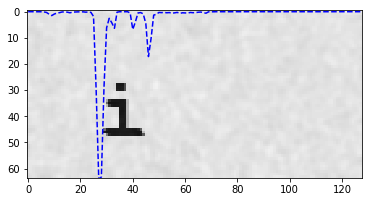

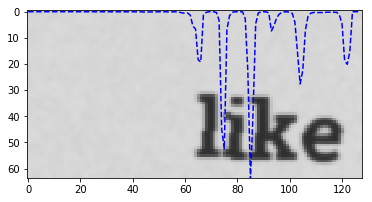

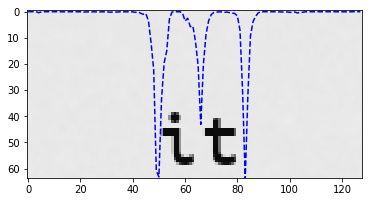

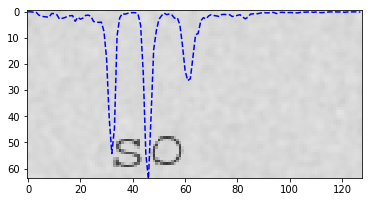

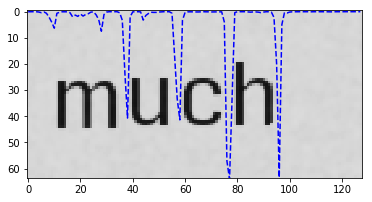

In [6]:
for word in ['this', 'word', 'is', 'so', 'cool', 'i', 'like', 'it', 'so', 'much']:
    
    # generating an image
    word_image, word_segments = utils.generate_text_image(word, height = height, width = width)
    
    # predicting segments on the image, blue on the plots
    predicted_word_segments = segment_model.predict(word_image)
    utils.show_image_with_segments(word_image, predicted_word_segments, mask = True)


# 2-ая модель
Задача 2-ой модели - RNN:
+ научиться улучшать предсказания предыдущей модели.

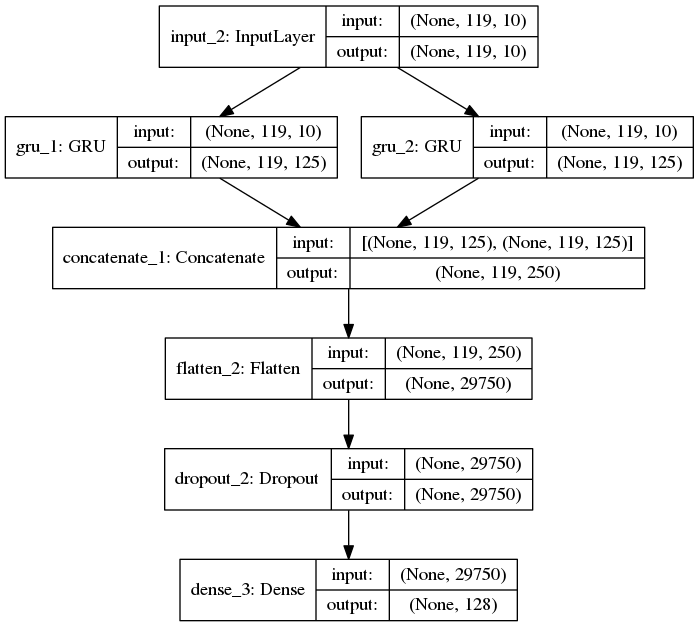

In [7]:
refine_model = refine.SegmentPredictionModel(segment_model = segment_model)
refine_model.display_architecture()

## Обучение
В конце каждой эпохи весы сохраняются в "OCR/my_train/refine".
Этот блок можно и не проигрывать, так как он может отнять у вас достаточно много времени.
Если блок не будет проигран, то все веса будут выгружаться из "OCR/train/refine".

In [8]:
refine_train_name = "my_train"
refine_model.train(refine_train_name, 0, refine_epochs)

Epoch 1/20
400/400 [==============================] - 107s 269ms/step - loss: 0.1565 - acc: 0.9623 - val_loss: 0.1353 - val_acc: 0.9646
Epoch 2/20
400/400 [==============================] - 107s 267ms/step - loss: 0.1244 - acc: 0.9653 - val_loss: 0.1177 - val_acc: 0.9645
Epoch 3/20
400/400 [==============================] - 107s 268ms/step - loss: 0.1103 - acc: 0.9650 - val_loss: 0.1082 - val_acc: 0.9643
Epoch 4/20
400/400 [==============================] - 107s 268ms/step - loss: 0.1034 - acc: 0.9648 - val_loss: 0.1020 - val_acc: 0.9644
Epoch 5/20
400/400 [==============================] - 109s 274ms/step - loss: 0.0984 - acc: 0.9651 - val_loss: 0.0964 - val_acc: 0.9649
Epoch 6/20
400/400 [==============================] - 110s 275ms/step - loss: 0.0920 - acc: 0.9658 - val_loss: 0.0885 - val_acc: 0.9660
Epoch 7/20
400/400 [==============================] - 108s 269ms/step - loss: 0.0853 - acc: 0.9670 - val_loss: 0.0843 - val_acc: 0.9666
Epoch 8/20
400/400 [============================

График обучения:

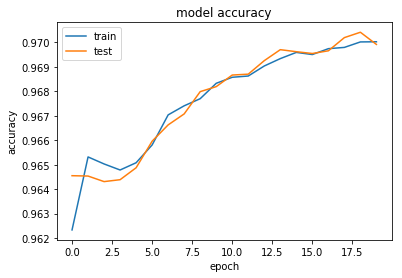

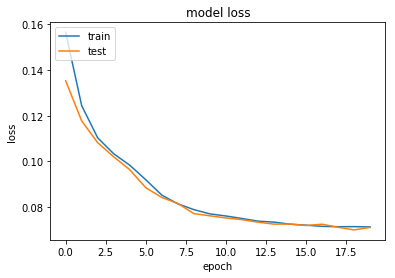

In [9]:
refine_model.display_train_history()

## Загрузка весов
Загрузка весов из "OCR/train/refine" (или же из "OCR/my_train/refine", если блок с обучением был проигран).

In [10]:
refine_model.load(refine_train_name, refine_epochs)

## Предсказание
Улчшаем предсказание по разбиению на сегменты для ранее сгенерированного изображения.

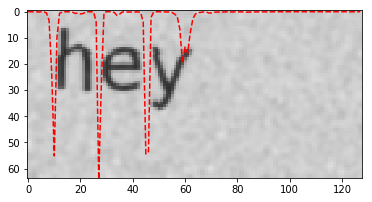

In [11]:
predicted_segments = refine_model.predict(predicted_segments)
utils.show_image_with_segments(text_image, predicted_segments, mask = True, color = 'r')

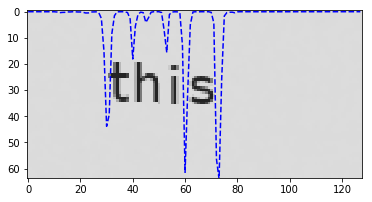

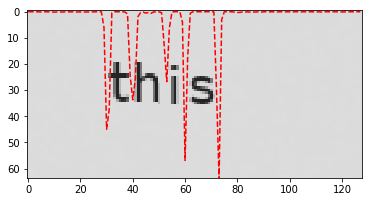

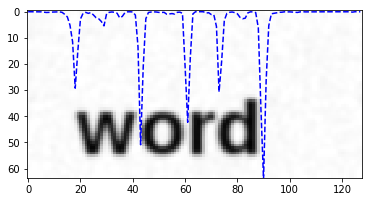

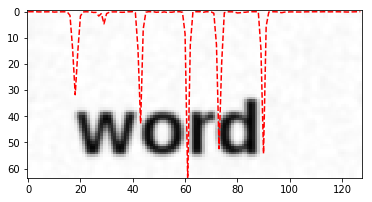

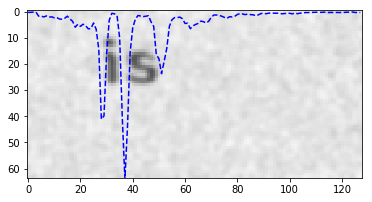

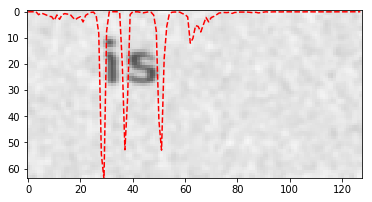

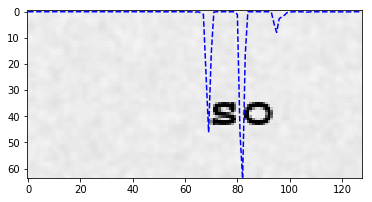

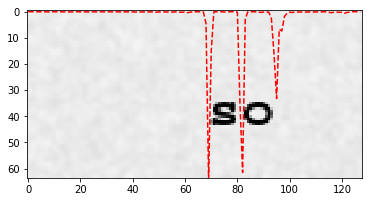

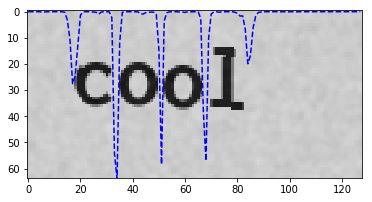

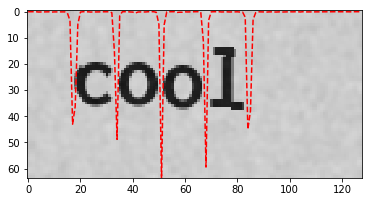

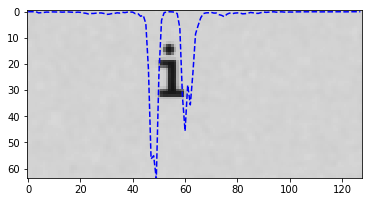

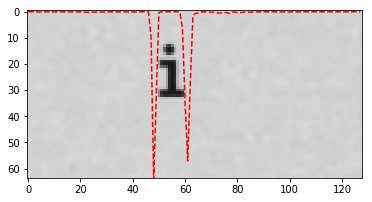

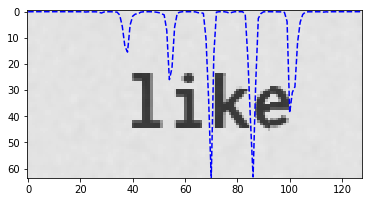

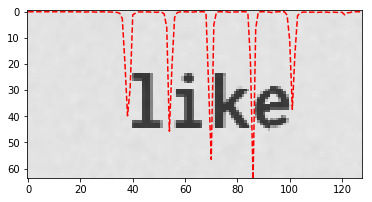

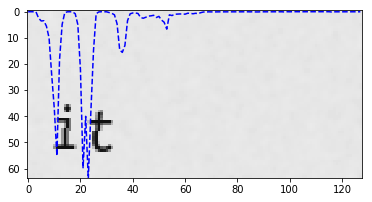

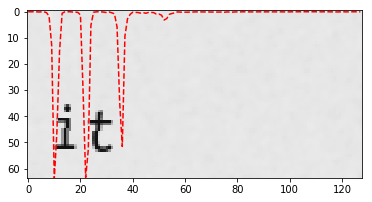

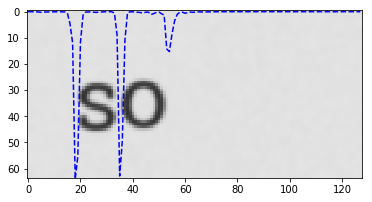

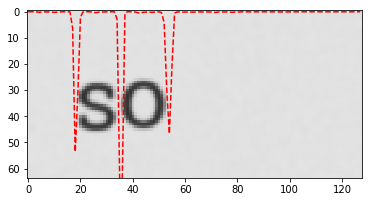

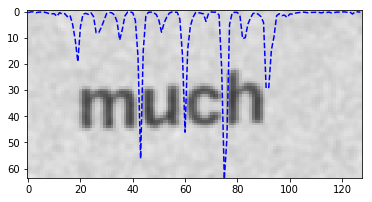

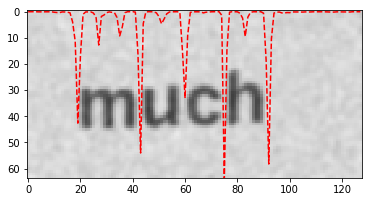

In [12]:
for word in ['this', 'word', 'is', 'so', 'cool', 'i', 'like', 'it', 'so', 'much']:
    
    # generating an image
    word_image, word_segments = utils.generate_text_image(word, height = height, width = width)
    
    # predicting segments on the image, blue - on the plots
    predicted_word_segments = segment_model.predict(word_image)
    utils.show_image_with_segments(word_image, predicted_word_segments, mask = True, color = 'b')
    
    # refining the prediction, red - on the plots
    predicted_word_segments = refine_model.predict(predicted_word_segments)
    utils.show_image_with_segments(word_image, predicted_word_segments, mask = True, color = 'r')


# Фильтр для предсказаний

В результате работы первой и второй модели над изображением с текстом, мы получаем массив длинной в количество пикселей, укладывающихся вдоль изображения. Каждый элемент массива - вероятность того, что данный столбец является элементом разбиения на изображения с отдельными буквами.

Задачей фильтра будет сделать превратить этот массив в массив {0, 1} или в эквивалентный ему массив x'ов являющихся элементами разбиения.

Это происходит в две стадии:
1. Слева направо двигаем окно размером 'segment_size_hint / 2' оставляя только максимальный элемент внутри окна.
После этого получим массив, в котором два ненулевых элемента находятся на расстоянии не меньшем, чем 'segment_size_hint / 2'.
2. Все элементы меньшие, чем 'segment_treshhold' превращаем в 0, большие - в 1.

Ниже показано поэтапное действие фильтра, который находится внутри функции 'split_image_on_segments'.

Без фильтра:


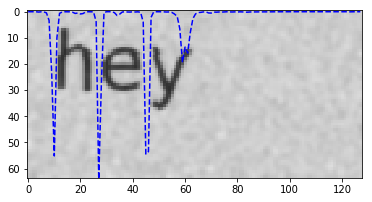

После 1 этапа фильтрации:


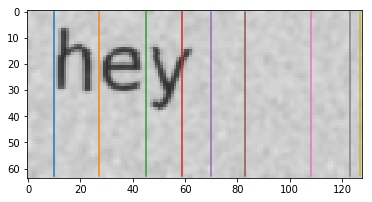

После 2 этапа фильтрации:


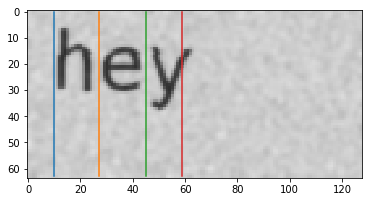

In [13]:
print('Без фильтра:')
utils.show_image_with_segments(text_image, predicted_segments, mask = True)

print('После 1 этапа фильтрации:')
_, filtered_segments = utils.split_image_on_segments(text_image, predicted_segments,
                                   segment_size_hint = 20, segment_treshhold = 0.0)
utils.show_image_with_segments(text_image, filtered_segments)

print('После 2 этапа фильтрации:')
_, filtered_segments = utils.split_image_on_segments(text_image, predicted_segments,
                                   segment_size_hint = 20, segment_treshhold = 0.2)
utils.show_image_with_segments(text_image, filtered_segments)

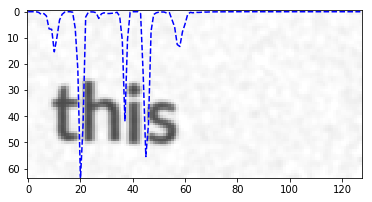

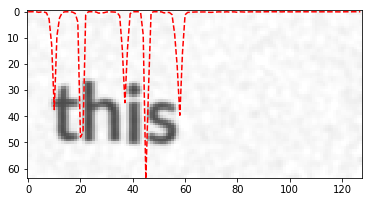

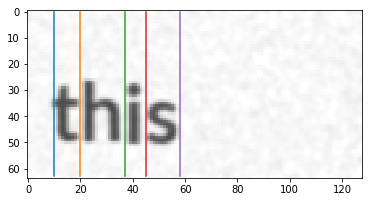

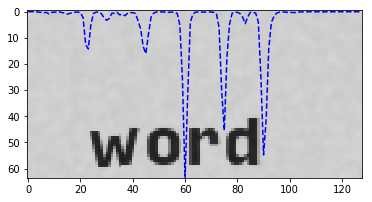

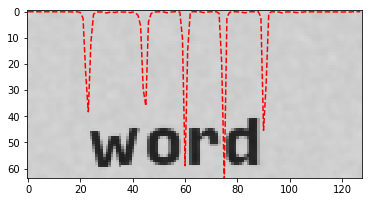

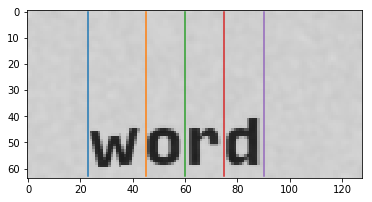

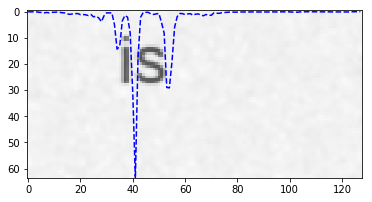

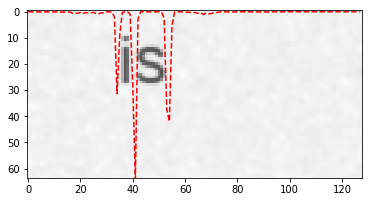

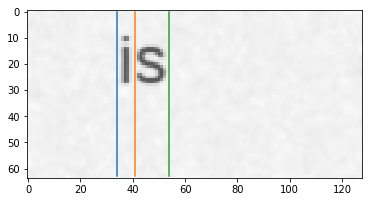

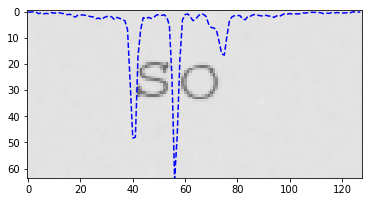

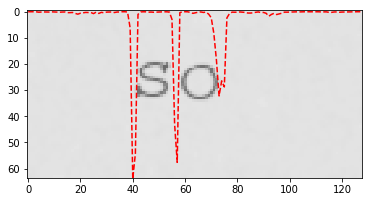

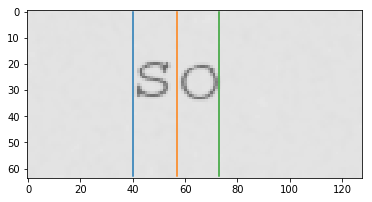

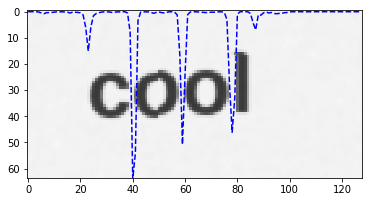

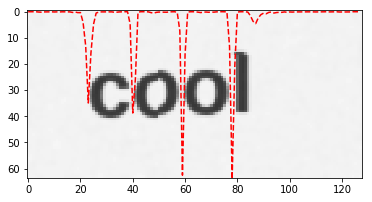

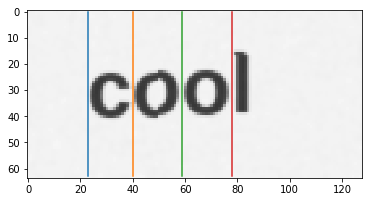

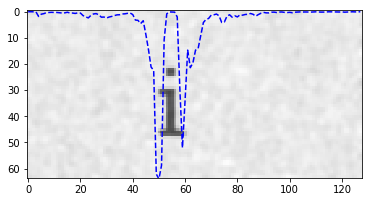

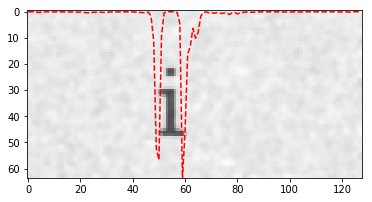

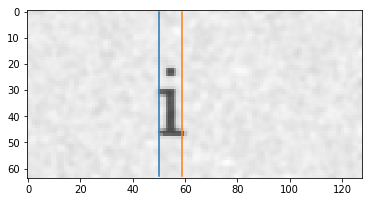

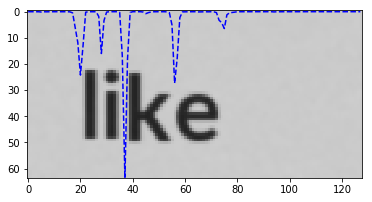

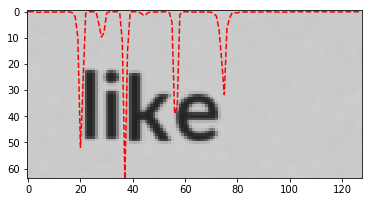

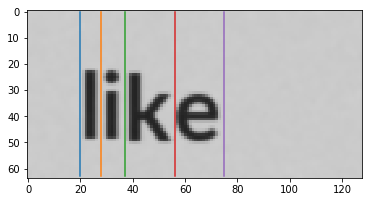

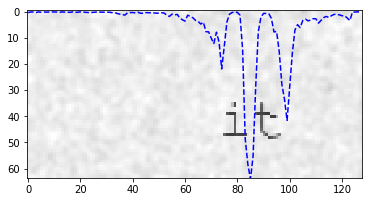

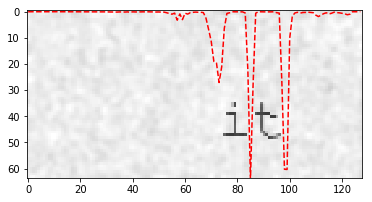

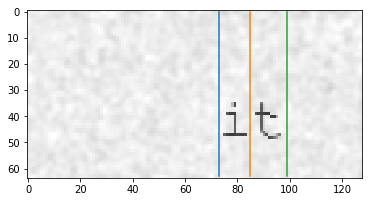

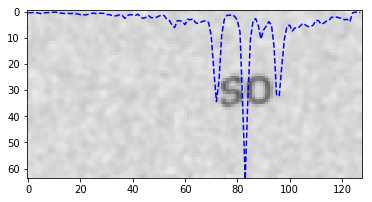

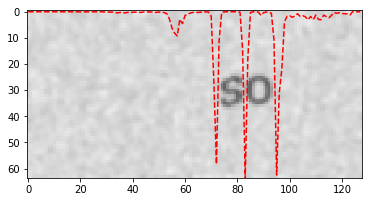

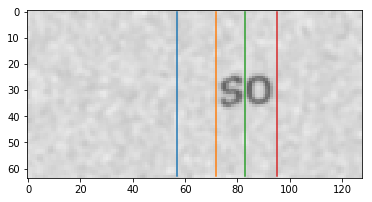

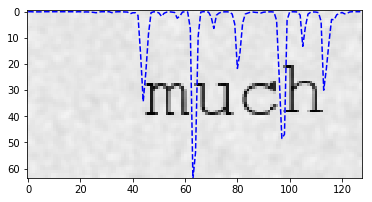

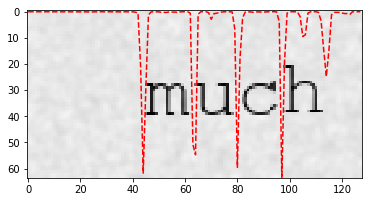

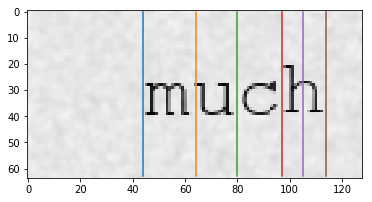

In [14]:
for word in ['this', 'word', 'is', 'so', 'cool', 'i', 'like', 'it', 'so', 'much']:
    
    # generating an image
    word_image, word_segments = utils.generate_text_image(word, height = height, width = width)
    
    # predicting segments on the image, blue - on the plots
    predicted_word_segments = segment_model.predict(word_image)
    utils.show_image_with_segments(word_image, predicted_word_segments, mask = True, color = 'b')
    
    # refining the prediction, red - on the plots
    predicted_word_segments = refine_model.predict(predicted_word_segments)
    utils.show_image_with_segments(word_image, predicted_word_segments, mask = True, color = 'r')

    # filtering the refined prediction
    _, filtered_word_segments = utils.split_image_on_segments(word_image, predicted_word_segments,
                                       segment_size_hint = 15, segment_treshhold = 0.1)

    utils.show_image_with_segments(word_image, filtered_word_segments, color = 'g')


# 3-ья модель

Задача 3-ей модели - CNN:
+ научиться правильно предсказывать букву на изображении

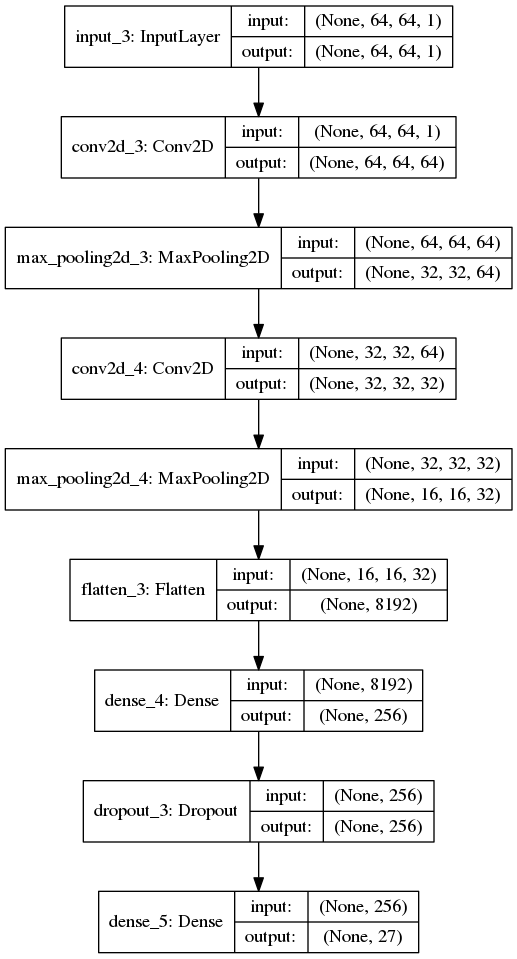

In [15]:
classify_model = classify.CharacterImageModel(image_height = height, image_width = height)
classify_model.display_architecture()

## Обучение
В конце каждой эпохи весы сохраняются в "OCR/my_train/classify".
Этот блок можно и не проигрывать, так как он может отнять у вас достаточно много времени.
Если блок не будет проигран, то все веса будут выгружаться из "OCR/train/classify".

In [16]:
classify_train_name = "my_train"
classify_model.train(classify_train_name, 0, classify_epochs)

Epoch 1/10
400/400 [==============================] - 38s 94ms/step - loss: 0.1340 - acc: 0.9636 - val_loss: 0.1036 - val_acc: 0.9650
Epoch 2/10
400/400 [==============================] - 39s 98ms/step - loss: 0.0829 - acc: 0.9703 - val_loss: 0.0604 - val_acc: 0.9772
Epoch 3/10
400/400 [==============================] - 41s 101ms/step - loss: 0.0518 - acc: 0.9805 - val_loss: 0.0364 - val_acc: 0.9862
Epoch 4/10
400/400 [==============================] - 38s 96ms/step - loss: 0.0334 - acc: 0.9873 - val_loss: 0.0256 - val_acc: 0.9900
Epoch 5/10
400/400 [==============================] - 40s 101ms/step - loss: 0.0235 - acc: 0.9911 - val_loss: 0.0171 - val_acc: 0.9939
Epoch 6/10
400/400 [==============================] - 40s 99ms/step - loss: 0.0177 - acc: 0.9937 - val_loss: 0.0126 - val_acc: 0.9957
Epoch 7/10
400/400 [==============================] - 41s 103ms/step - loss: 0.0139 - acc: 0.9949 - val_loss: 0.0090 - val_acc: 0.9972
Epoch 8/10
400/400 [==============================] - 40s 9

График обучения:

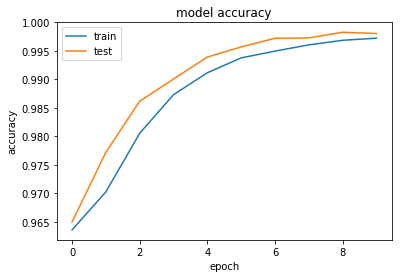

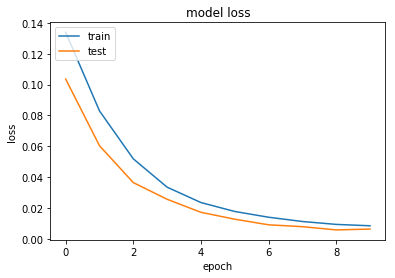

In [17]:
classify_model.display_train_history()

In [48]:
classify_epochs = 15
classify_model.train(classify_train_name, 10, classify_epochs)

Epoch 11/15
400/400 [==============================] - 38s 94ms/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0025 - val_acc: 0.9993
Epoch 12/15
400/400 [==============================] - 37s 93ms/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0014 - val_acc: 0.9997
Epoch 13/15
400/400 [==============================] - 37s 93ms/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0012 - val_acc: 0.9998
Epoch 14/15
400/400 [==============================] - 38s 94ms/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0013 - val_acc: 0.9998
Epoch 15/15
400/400 [==============================] - 39s 97ms/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0012 - val_acc: 0.9997


## Загрузка весов
Загрузка весов из "OCR/train/classify" (или же из "OCR/my_train/classify", если блок с обучением был проигран).

In [14]:
classify_model.load(classify_train_name, classify_epochs)

## Предсказание
Предсказываем букву на ранее сгенерированном изображении.

In [18]:
classify_model.predict(character_image)

'h'

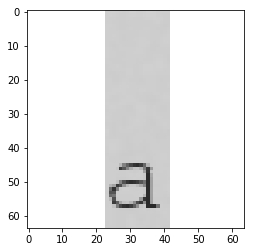

Буква: 'a'


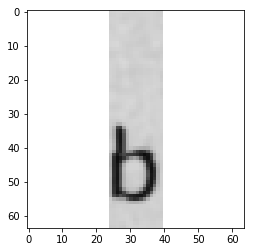

Буква: 'b'


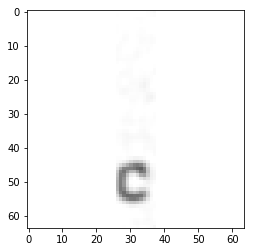

Буква: 'c'


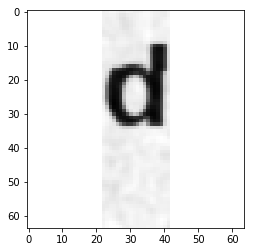

Буква: 'd'


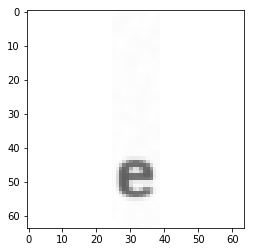

Буква: 'e'


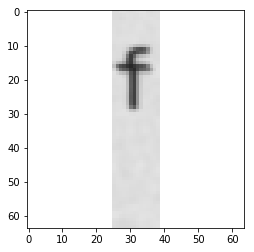

Буква: 'f'


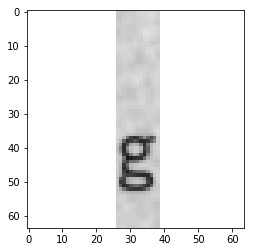

Буква: 'g'


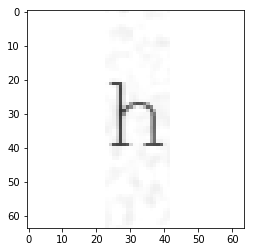

Буква: 'h'


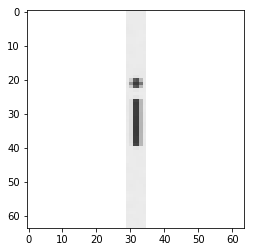

Буква: 'i'


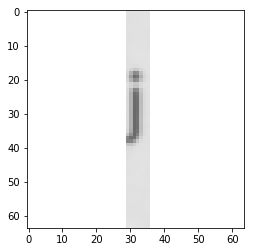

Буква: 'j'


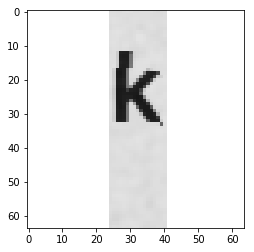

Буква: 'k'


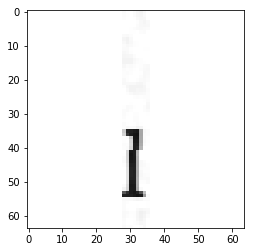

Буква: 'l'


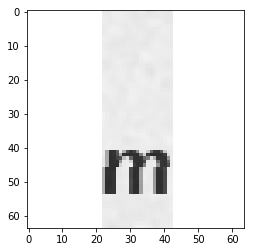

Буква: 'm'


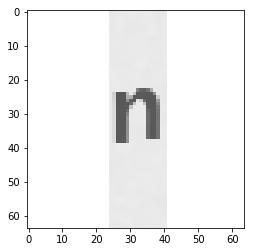

Буква: 'n'


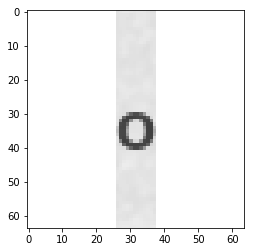

Буква: 'o'


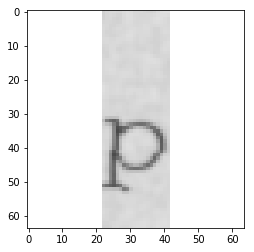

Буква: 'p'


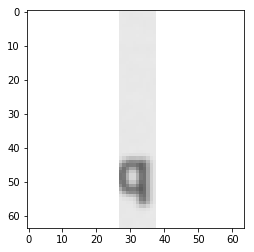

Буква: 'a'


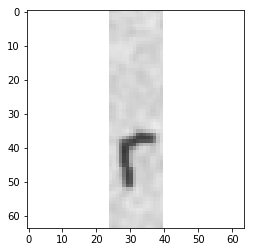

Буква: 'r'


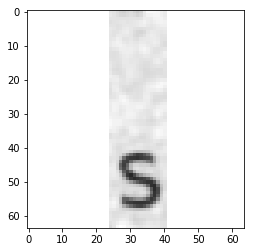

Буква: 's'


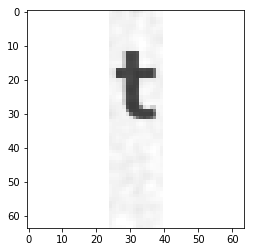

Буква: 't'


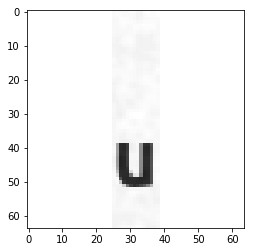

Буква: 'u'


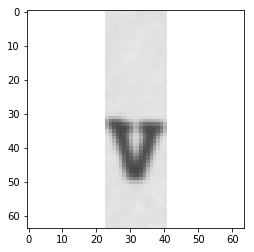

Буква: 'v'


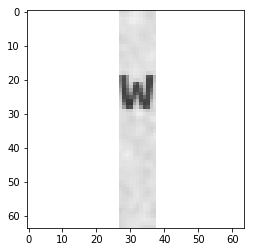

Буква: 'w'


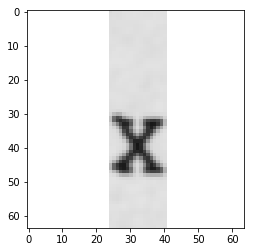

Буква: 'x'


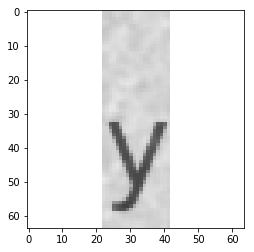

Буква: 'y'


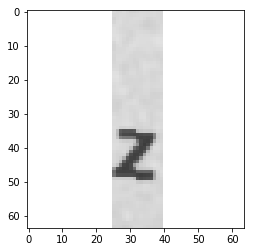

Буква: 'z'


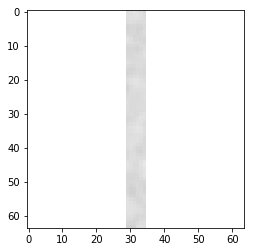

Буква: 'm'


In [19]:
for letter in 'abcdefghijklmnopqrstuvwxyz ':
    
    # generating a letter image
    letter_image, segments = utils.generate_text_image(letter, height = height, width = width)
    letter_image = utils.extend_image_size(letter_image[:, :, segments[0]:segments[1]], new_width = height)
    utils.show_image_with_segments(letter_image, [])
    
    # predicting a letter on the image
    print("Буква: '%s'" % classify_model.predict(letter_image))


# Text recognizer

Абстракция, которая объединяет все три обученные модели для распознавания текста.

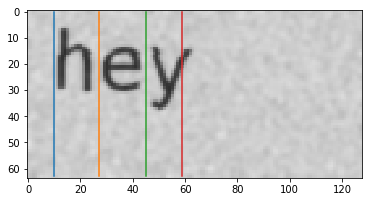

'hey'

In [20]:
text_recognizer = recognize.TextImage(segment_model, refine_model, classify_model,
                                     character_size_hint = 20, character_treshhold = 0.1,
                                     show_segmentation = True)

text_recognizer.recognize(text_image)

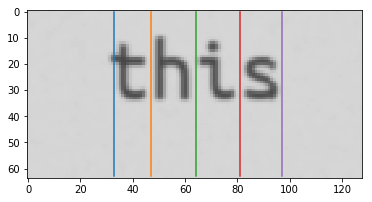

Слово: 'this'


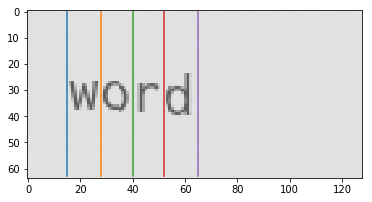

Слово: 'word'


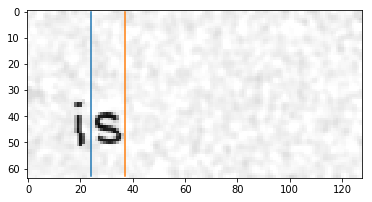

Слово: 's'


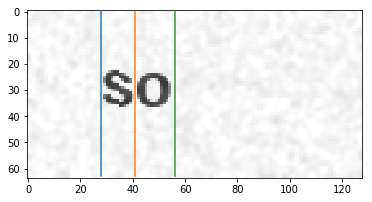

Слово: 'so'


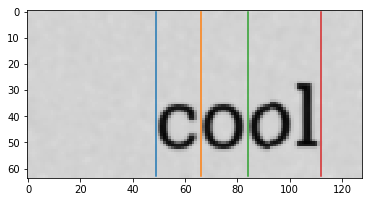

Слово: 'com'


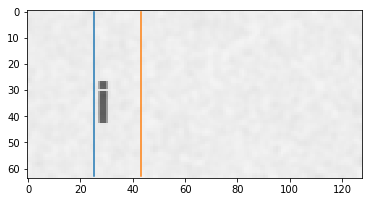

Слово: 'h'


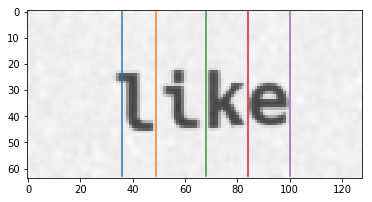

Слово: 'tike'


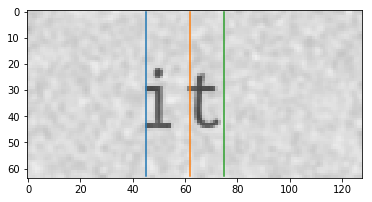

Слово: 'rt'


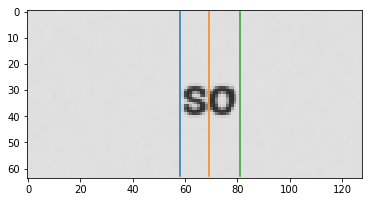

Слово: 'so'


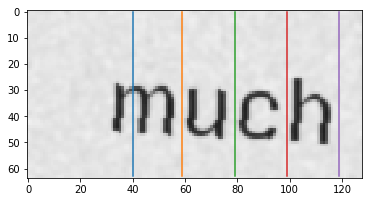

Слово: 'nuch'


In [21]:
for word in ['this', 'word', 'is', 'so', 'cool', 'i', 'like', 'it', 'so', 'much']:
    word_image, _ = utils.generate_text_image(word)
    print("Слово: '%s'" % text_recognizer.recognize(word_image))

## Эксперимент на реальных данных

В этом эксперименте текст детектировался на изображениях с текстом из директории ./examples.
Директория содержит несколько примеров изображений напечатанного текста, сфотографированного на камеру мобильного телефона.

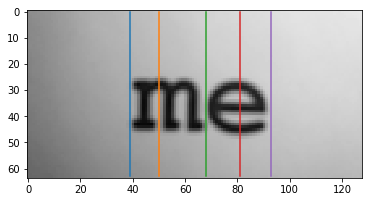

zncb


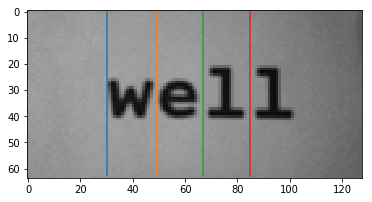

wel


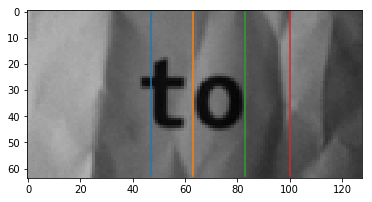

tom


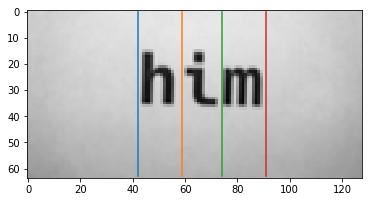

him


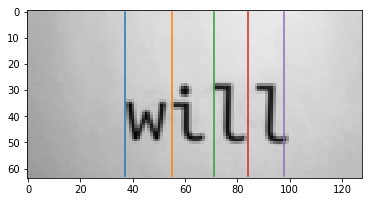

wtlj


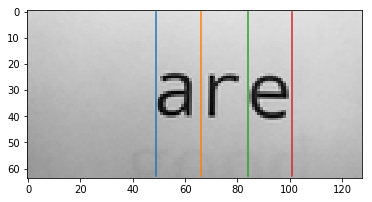

are


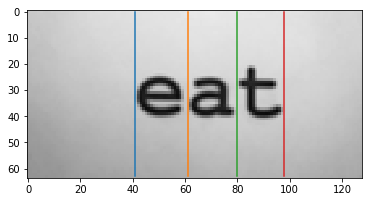

eat


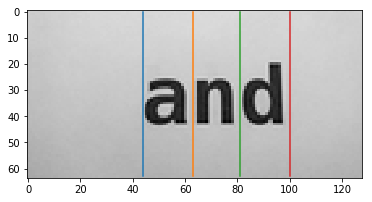

and


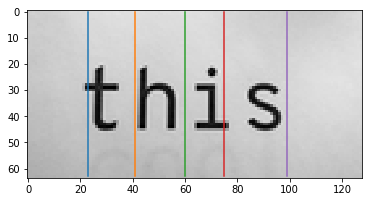

thdc


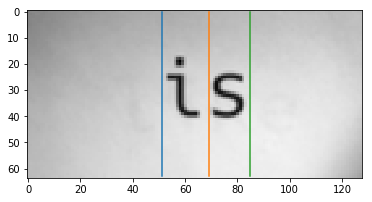

ls


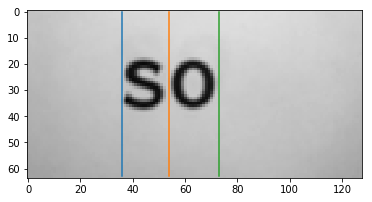

so


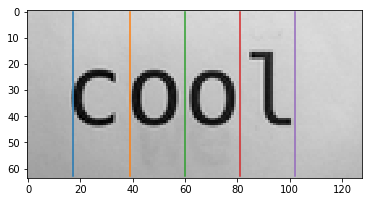

cool


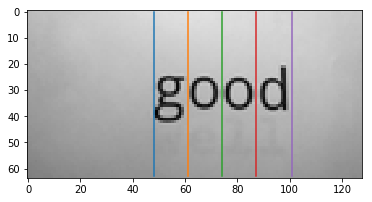

good


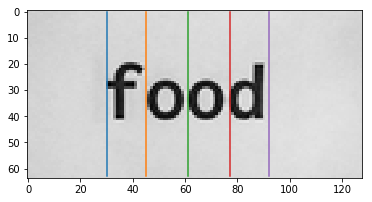

rood


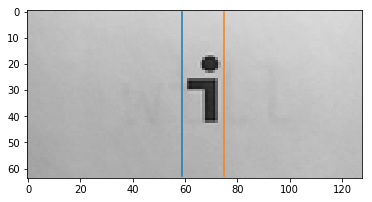

j


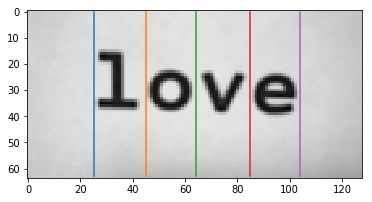

love


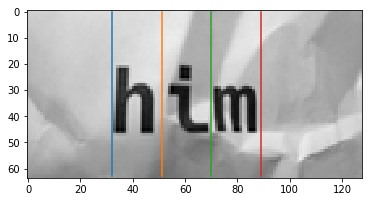

him


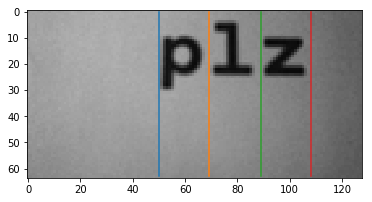

plm


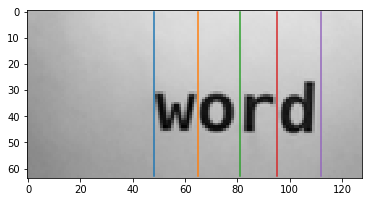

word


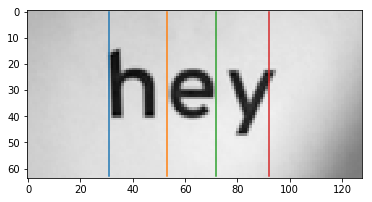

wev


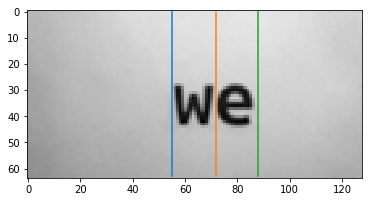

we


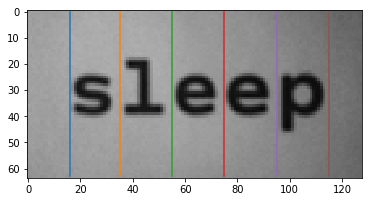

sleep


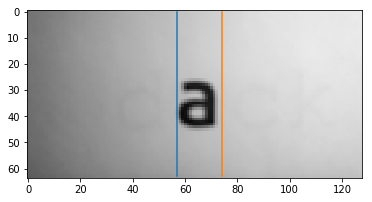

a


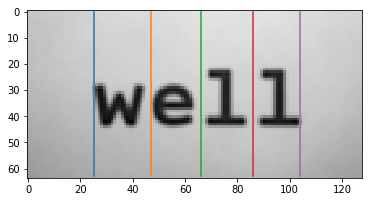

welj


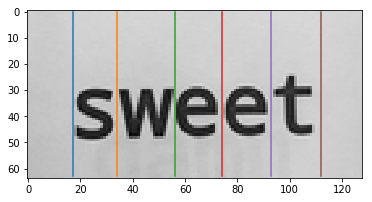

sweet


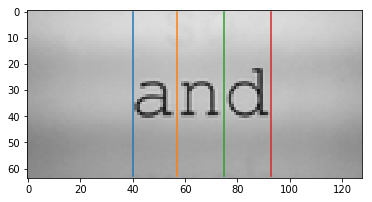

and


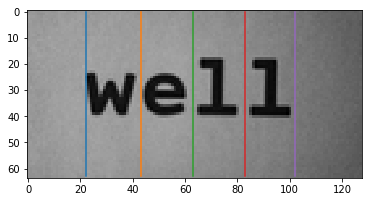

welx


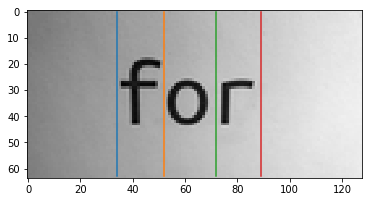

ror


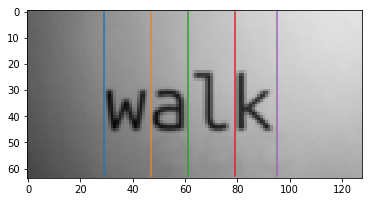

walk


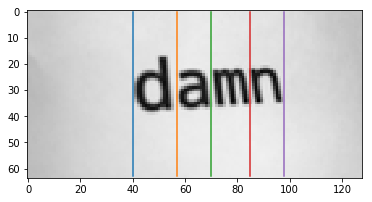

damn


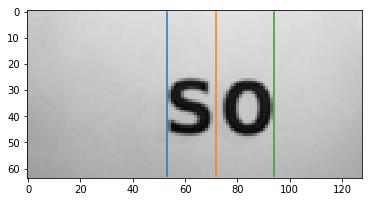

so


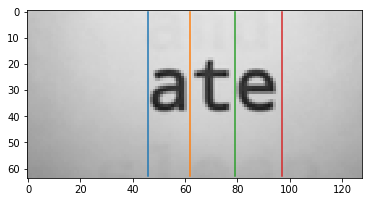

ate


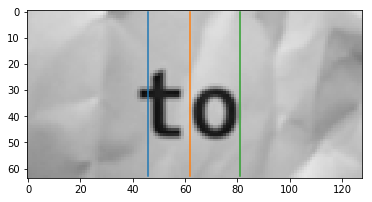

to


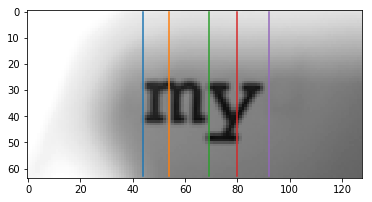

znqp


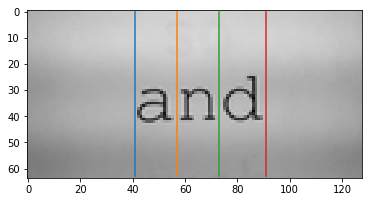

and


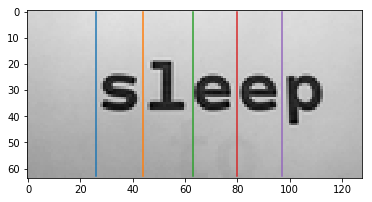

slee


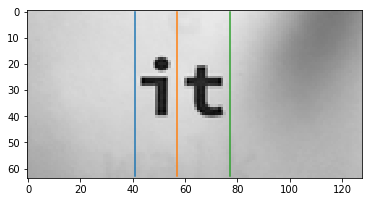

jt


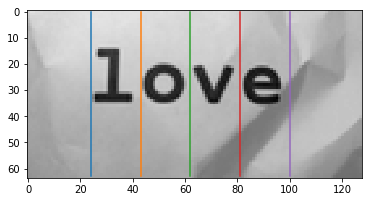

love


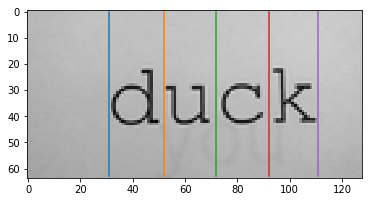

duck


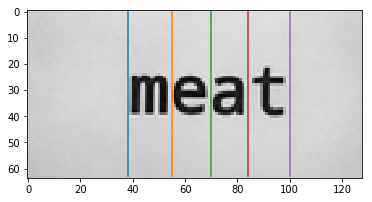

meat


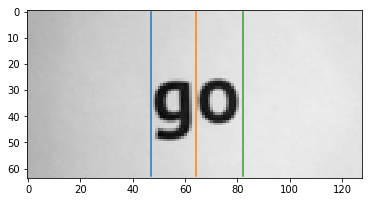

go


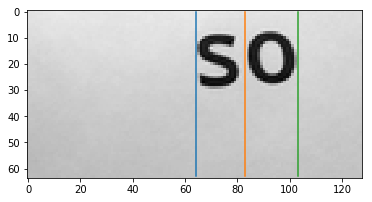

aw


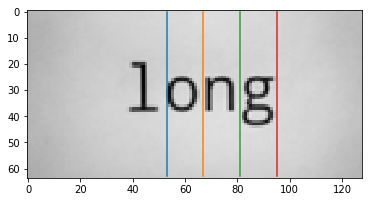

ong


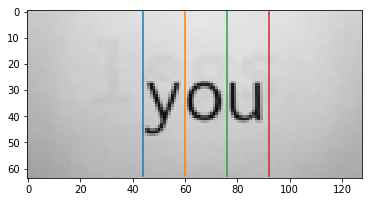

you


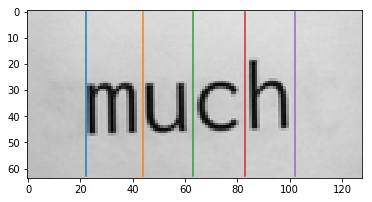

much


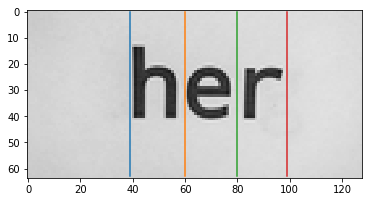

her


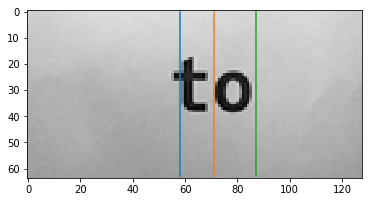

to


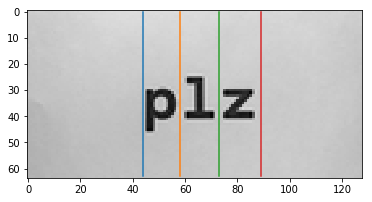

plz


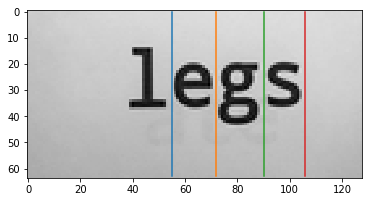

egs


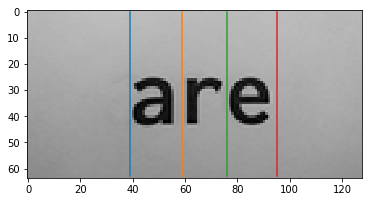

are


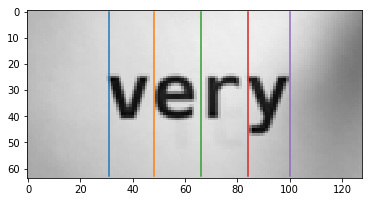

very


In [22]:
import os
file_names = os.listdir('examples/photos')

for fname in file_names:
    text_image = utils.open_gray_image('examples/photos/'+fname, height = 64, width = 128)
    text = text_recognizer.recognize(text_image)
    print("%s" % (text))

### Анализ ошибок

Не самые удачные результаты показывают, что при достаточно точном разбиении, классификация букв на реальных изображениях работатет не лучшим образом (хотя иногда и понятным 'h ~ b', 'e ~ c', 'y ~ v').

Среди отличий букв на реальных изображениях и сгенерированных можно отметить размытую границу фигуры и в случае тонких линий - серый цвет букв.

Это можно было бы исправить preprocessing'ом реальных изображений, увеличивая их контрастность или даже бинаризуя их на {0, 1}. Также стоило бы обучить все модели на реальных, а не сгенерированных данных, но так как удачного датасета с размеченными буквами найти не удалось, то обучение пришлось проводить на генераторах.